### AUTOENCODERS

#### Dense Autoencoders

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
encoder = Sequential([layers.Dense(2, input_shape=[3])])
decoder = Sequential([layers.Dense(3, input_shape=[2])])

autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="mse", optimizer="sgd")

In [ ]:
import numpy as np

def generate_3d_data(m ,w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi/2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m)/2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m)/2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w1 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [ ]:
autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 6ms/step - loss: 0.2460
Epoch 2/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2429
Epoch 3/20
2/2 [==============================] - 0s 3ms/step - loss: 0.2397
Epoch 4/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2369
Epoch 5/20
2/2 [==============================] - 0s 3ms/step - loss: 0.2338
Epoch 6/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2310
Epoch 7/20
2/2 [==============================] - 0s 3ms/step - loss: 0.2282
Epoch 8/20
2/2 [==============================] - 0s 4ms/step - loss: 0.2256
Epoch 9/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2230
Epoch 10/20
2/2 [==============================] - 0s 6ms/step - loss: 0.2204
Epoch 11/20
2/2 [==============================] - 0s 4ms/step - loss: 0.2180
Epoch 12/20
2/2 [==============================] - 0s 7ms/step - loss: 0.2156
Epoch 13/20
2/2 [==============================] - 0s 5ms/step - loss: 0.

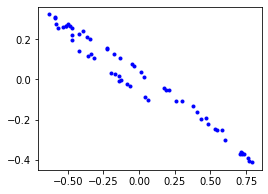

In [ ]:
import matplotlib.pyplot as plt

coding = autoencoder.predict(X_train)
plt.figure(figsize=(4, 3))
plt.plot(coding[:, 0], coding[:, 1], "b.")

In [8]:
#load mnist

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [9]:
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [ ]:
## mnist autoencoder

stacked_encoder = Sequential([
                layers.Flatten(input_shape=[28, 28]), 
                layers.Dense(100, activation="selu"), 
                layers.Dense(30, activation="selu")
])
stacked_decoder = Sequential([
                layers.Dense(100, activation="selu", input_shape=[30]), 
                layers.Dense(28 * 28, activation="sigmoid"), 
                layers.Reshape([28, 28])
])

stacked_autoencoder = Sequential([
                stacked_encoder, stacked_decoder
])
stacked_autoencoder.compile(loss="binary_crossentropy", 
                optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [ ]:
stacked_autoencoder.fit(X_train, X_train, epochs=20, 
                        validation_data=(X_test, X_test))

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3358 - val_loss: 0.3110
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3046 - val_loss: 0.3013
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2974 - val_loss: 0.2958
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2933 - val_loss: 0.2932
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2909 - val_loss: 0.2965
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2889 - val_loss: 0.2895
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2876 - val_loss: 0.2888
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2864 - val_loss: 0.2882
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2856 - val_loss: 0.2871
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2

In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

def show_reconstructions(model, n_images=5):
    reconstruction = model.predict(X_test[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(X_test[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstruction[image_index])

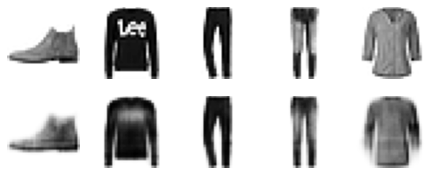

In [ ]:
show_reconstructions(stacked_autoencoder)

In [ ]:
!pip install sklearn --upgrade

In [ ]:
from sklearn.manifold import TSNE

X_test_compressed = stacked_encoder.predict(X_test)
tsne = TSNE()
X_test_2D = tsne.fit_transform(X_test_compressed)

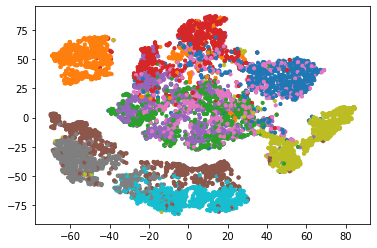

In [ ]:
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, s=10, cmap="tab10")

In [5]:
class DenseTranspose(layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias", initializer="zeros", 
                                      shape=[self.dense.input_shape[-1]])
        super().build(batch_input_shape)
    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

In [7]:
dense_1 = layers.Dense(100, activation="selu")
dense_2 = layers.Dense(10, activation="selu")

tied_encoder = Sequential([
                layers.Flatten(input_shape=[28, 28]), 
                dense_1, dense_2
])

tied_decoder = Sequential([
                DenseTranspose(dense_2, activation="selu"), 
                DenseTranspose(dense_1, activation="sigmoid"), 
                layers.Reshape([28, 28])
])
tied_autoencoder = Sequential([
                    tied_encoder, tied_decoder
])

In [11]:
tied_autoencoder.compile(
    loss="binary_crossentropy", 
    optimizer="sgd"
)
tied_autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6723
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5834
Epoch 3/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5308
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5066
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4799
Epoch 6/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4526
Epoch 7/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4300
Epoch 8/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4125
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3995
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3898
Epoch 11/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3826
Epoch 12/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3771
E

#### Convolutional Autoencoders

In [12]:
conv_encoder = Sequential([
                layers.Reshape([28, 28, 1], input_shape=[28, 28]), 
                layers.Conv2D(16, kernel_size=3, padding="same", activation="selu"), 
                layers.MaxPool2D(pool_size=2), 
                layers.Conv2D(32, kernel_size=3, padding="same", activation="selu"), 
                layers.MaxPool2D(pool_size=2), 
                layers.Conv2D(64, kernel_size=3, padding="same", activation="selu"), 
                layers.MaxPool2D(pool_size=2)
])

conv_decoder = Sequential([
                layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="valid", 
                                       activation="selu", input_shape=[3, 3, 64]), 
                layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="same", 
                                       activation="selu"), 
                layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="same", 
                                       activation="sigmoid"), 
                layers.Reshape([28, 28])
])
conv_autoencoder = Sequential([conv_encoder, conv_decoder])